## Preparing Data

### Table of Contents

- [Missing Data](#h1_cell)
- [Duplicate Data](#h2_cell)
- [Normalization](#h3_cell)
- [Joins](#h4_cell)

Datasets frequently need to be prepared before they can be used. Common issues include missing values and duplicates, which need to be handled before performing any analysis.

### Covered in This Module

- Finding issues with the data
- Types of missing values
- Handling missing values
- Finding and removing duplicates
- How and when to normalize data
- Simple joins

***

<a id='h1_cell'></a>
### Missing Values

Missing values refer to data entries of variables with no value, often represented with NULL or None. Forgetting to handle missing values can lead to incorrect or unexpected results, and some ML algorithms cannot handle missing values at all.

There are three main types of missing values:

* <b>MCAR (Missing Completely at Random)</b>: The events that lead to any particular data-item being missing occur entirely at random. For example, in Internet of Things (IOT), you can lose sensory data during transmission.

* <b>MAR (Missing {Conditionally} at Random)</b>: Missing data does not occur at random, and is instead related to some other observed data. For example, some students may have not answered questions on a test because they were absent during the relevant lesson.

* <b>MNAR (Missing not at Random)</b>: The value of the missing variable is related to the reason it's missing. For example, if someone did not subscribe to a loyalty program, a variable relating to the subscription could be empty.

The different types of missing values must be handled differently. For example, MCAR values can typically be imputed with mathematical aggregations, while MNAR values can be handled with another variable/category. The method for handling MAR values, however, varies more significantly and depends on the nature of the data.

To see how to handle missing values in VerticaPy, we use the well-known 'Titanic' dataset:

```python
from verticapy.datasets import load_titanic
vdf = load_titanic()
display(vdf)
```



pclass    survived                                      name   \\
1           1           0              Allison, Miss. Helen Loraine   \\
2           1           0      Allison, Mr. Hudson Joshua Creighton   \\
3           1           0  Allison, Mrs. Hudson J C (Bessie Wald...   \\
4           1           0                    Andrews, Mr. Thomas Jr   \\
5           1           0                   Artagaveytia, Mr. Ramon   \\
6           1           0                    Astor, Col. John Jacob   \\
7           1           0                       Baumann, Mr. John D   \\
8           1           0                  Baxter, Mr. Quigg Edmond   \\
9           1           0                      Beattie, Mr. Thomson   \\
10          1           0                       Birnbaum, Mr. Jakob   \\
11          1           0              Blackwell, Mr. Stephen Weart   \\
12          1           0                  Borebank, Mr. John James   \\
13          1           0                   Brady, Mr. John Bertram   \\
14          1           0                        Brandeis, Mr. Emil   \\
15          1           0                 Brewe, Dr. Arthur Jackson   \\
16          1           0         Butt, Major. Archibald Willingham   \\
17          1           0                     Cairns, Mr. Alexander   \\
18          1           0                  Carlsson, Mr. Frans Olof   \\
19          1           0                   Carrau, Mr. Francisco M   \\
20          1           0                    Carrau, Mr. Jose Pedro   \\
21          1           0                    Case, Mr. Howard Brown   \\
22          1           0             Cavendish, Mr. Tyrell William   \\
23          1           0               Chaffee, Mr. Herbert Fuller   \\
24          1           0     Chisholm, Mr. Roderick Robert Crispin   \\
25          1           0                  Clark, Mr. Walter Miller   \\
26          1           0               Clifford, Mr. George Quincy   \\
27          1           0                Colley, Mr. Edward Pomeroy   \\
28          1           0          Compton, Mr. Alexander Taylor Jr   \\
29          1           0                 Crafton, Mr. John Bertram   \\
30          1           0              Crosby, Capt. Edward Gifford   \\
31          1           0                 Cumings, Mr. John Bradley   \\
32          1           0                    Davidson, Mr. Thornton   \\
33          1           0                Douglas, Mr. Walter Donald   \\
34          1           0              Dulles, Mr. William Crothers   \\
35          1           0                  Evans, Miss. Edith Corse   \\
36          1           0                        Farthing, Mr. John   \\
37          1           0           Foreman, Mr. Benjamin Laventall   \\
38          1           0            Fortune, Mr. Charles Alexander   \\
39          1           0                         Fortune, Mr. Mark   \\
40          1           0               Franklin, Mr. Thomas Parham   \\
41          1           0                          Fry, Mr. Richard   \\
42          1           0               Futrelle, Mr. Jacques Heath   \\
43          1           0                         Gee, Mr. Arthur H   \\
44          1           0                        Giglio, Mr. Victor   \\
45          1           0                 Goldschmidt, Mr. George B   \\
46          1           0                 Graham, Mr. George Edward   \\
47          1           0                  Guggenheim, Mr. Benjamin   \\
48          1           0                 Harrington, Mr. Charles H   \\
49          1           0               Harris, Mr. Henry Birkhardt   \\
50          1           0                     Harrison, Mr. William   \\
51          1           0                Hays, Mr. Charles Melville   \\
52          1           0                     Head, Mr. Christopher   \\
53          1           0               Hilliard, Mr. Herbert Henry   \\
54          1           0               Hipkins, Mr. William Edwa
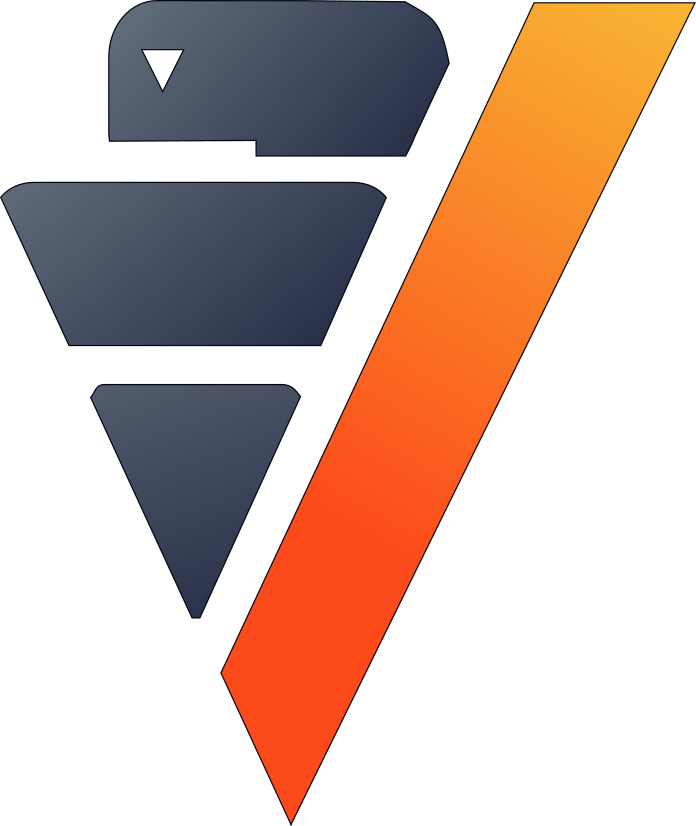

In [1]:
from verticapy.datasets import load_titanic
vdf = load_titanic()
display(vdf)

Get the total number of data entries in each column with `count_percent()`:

```ptyhon
vdf.count_percent()
```

count    percent  
"pclass"         1234.0      100.0  
"survived"       1234.0      100.0  
"name"           1234.0      100.0  
"sex"            1234.0      100.0  
"sibsp"          1234.0      100.0  
"parch"          1234.0      100.0  
"ticket"         1234.0      100.0  
"fare"           1233.0     99.919  
"embarked"       1232.0     99.838  
"age"             997.0     80.794  
"home.dest"       706.0     57.212  
"boat"            439.0     35.575  
"cabin"           286.0     23.177  
"body"            118.0      9.562  
Rows: 1-14 | Columns: 3
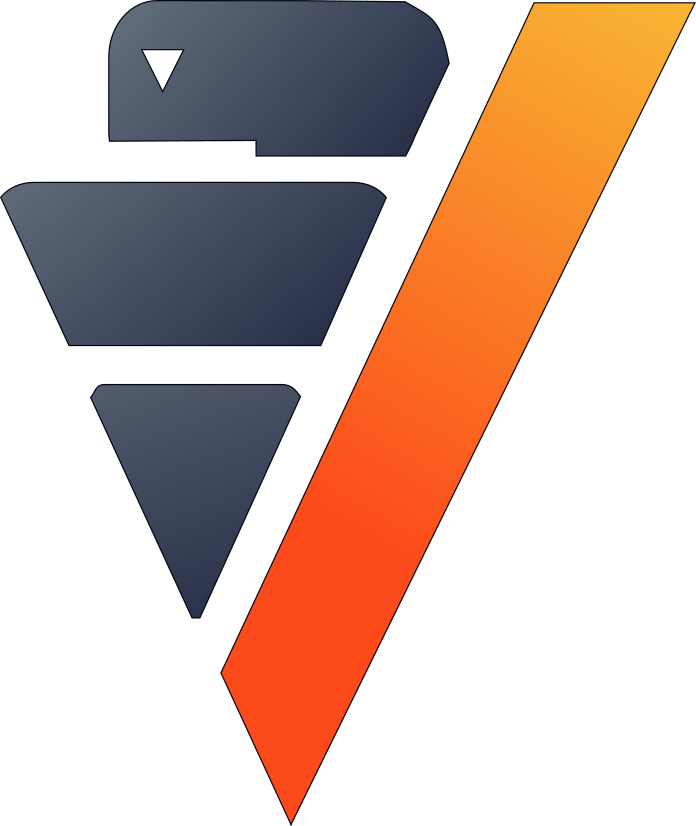

In [2]:
vdf.count_percent()

The missing values for 'boat' are MNAR; a missing value simply indicates that the passenger did not pay for a lifeboat. We can replace all the missing values with a new category 'No Lifeboat' with `fillna()`:

```python
vdf["boat"].fillna("No Lifeboat")
vdf["boat"]
```

795 elements were filled.


boat  
1      No Lifeboat  
2      No Lifeboat  
3      No Lifeboat  
4      No Lifeboat  
5      No Lifeboat  
6      No Lifeboat  
7      No Lifeboat  
8      No Lifeboat  
9                A  
10     No Lifeboat  
11     No Lifeboat  
12     No Lifeboat  
13     No Lifeboat  
14     No Lifeboat  
15     No Lifeboat  
16     No Lifeboat  
17     No Lifeboat  
18     No Lifeboat  
19     No Lifeboat  
20     No Lifeboat  
21     No Lifeboat  
22     No Lifeboat  
23     No Lifeboat  
24     No Lifeboat  
25     No Lifeboat  
26     No Lifeboat  
27     No Lifeboat  
28     No Lifeboat  
29     No Lifeboat  
30     No Lifeboat  
31     No Lifeboat  
32     No Lifeboat  
33     No Lifeboat  
34     No Lifeboat  
35     No Lifeboat  
36     No Lifeboat  
37     No Lifeboat  
38     No Lifeboat  
39     No Lifeboat  
40     No Lifeboat  
41     No Lifeboat  
42     No Lifeboat  
43     No Lifeboat  
44     No Lifeboat  
45     No Lifeboat  
46     No Lifeboat  
47     No Lifeboat  
48     No Lifeboat  
49     No Lifeboat  
50     No Lifeboat  
51     No Lifeboat  
52     No Lifeboat  
53     No Lifeboat  
54     No Lifeboat  
55     No Lifeboat  
56              14  
57     No Lifeboat  
58     No Lifeboat  
59     No Lifeboat  
60     No Lifeboat  
61     No Lifeboat  
62     No Lifeboat  
63     No Lifeboat  
64     No Lifeboat  
65     No Lifeboat  
66     No Lifeboat  
67     No Lifeboat  
68     No Lifeboat  
69     No Lifeboat  
70     No Lifeboat  
71     No Lifeboat  
72     No Lifeboat  
73     No Lifeboat  
74     No Lifeboat  
75     No Lifeboat  
76     No Lifeboat  
77     No Lifeboat  
78     No Lifeboat  
79     No Lifeboat  
80     No Lifeboat  
81     No Lifeboat  
82     No Lifeboat  
83     No Lifeboat  
84     No Lifeboat  
85     No Lifeboat  
86     No Lifeboat  
87     No Lifeboat  
88     No Lifeboat  
89     No Lifeboat  
90     No Lifeboat  
91     No Lifeboat  
92     No Lifeboat  
93     No Lifeboat  
94     No Lifeboat  
95     No Lifeboat  
96     No Lifeboat  
97     No Lifeboat  
98     No Lifeboat  
99     No Lifeboat  
100    No Lifeboat  
...            ...  
Rows: 1-100 of 1234 | Column: boat | Type: Varchar(100)
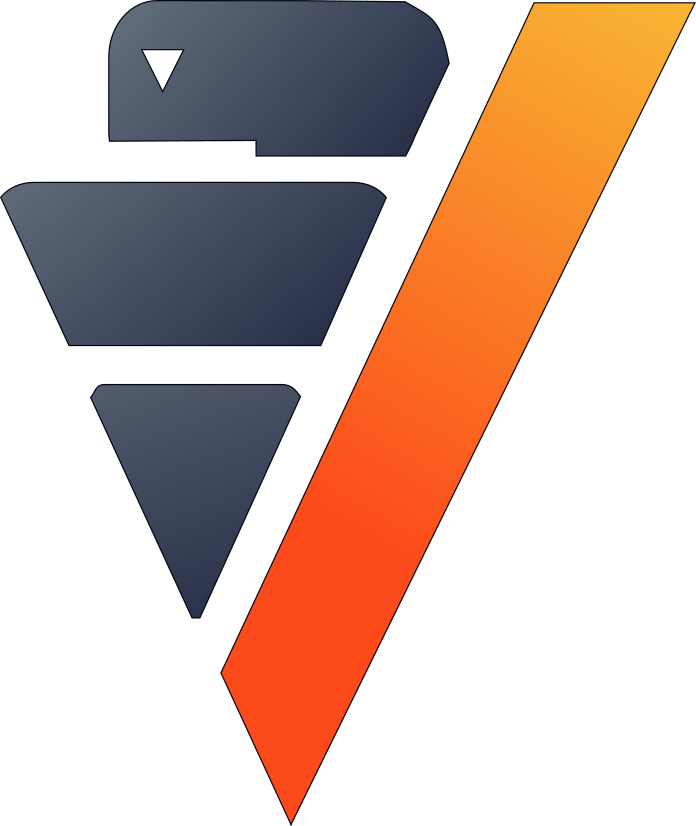

In [3]:
vdf["boat"].fillna("No Lifeboat")
vdf["boat"]

Missing values for 'age' seem to be MCAR, so the best way to impute them is with mathematical aggregations. Impute the age using the average age of passengers of the same sex and class:

```python
vdf["age"].fillna(method = "avg",
                  by = ["pclass", "sex"])
vdf["age"]
```

237 elements were filled.


age  
1                  36.0  
2                  31.0  
3                  21.0  
4                  50.0  
5                  45.0  
6                  31.0  
7                  55.0  
8                  60.0  
9                  35.0  
10     37.2635658914729  
11                 39.0  
12     37.2635658914729  
13                 39.0  
14                 18.0  
15                 48.0  
16                 62.0  
17                 52.0  
18                 43.0  
19     37.2635658914729  
20                 40.0  
21                 23.0  
22                 18.0  
23                 39.0  
24                 40.0  
25                 30.0  
26                 35.0  
27                 24.0  
28                 48.0  
29                 18.0  
30                 54.0  
31                 33.0  
32                 33.0  
33                 43.0  
34                 56.0  
35                 30.0  
36                 17.0  
37                 22.0  
38                 22.0  
39                 39.0  
40                 19.0  
41                 23.0  
42                 31.0  
43                 37.0  
44                 33.0  
45     37.2635658914729  
46                 18.0  
47                 16.0  
48                 15.0  
49                 58.0  
50                 21.0  
51                 51.0  
52                 16.0  
53                 55.0  
54                 49.0  
55                 30.0  
56                 39.0  
57                 45.0  
58     37.2635658914729  
59                 38.0  
60                 35.0  
61                 35.0  
62                 51.0  
63                 44.0  
64                 16.0  
65                 52.0  
66                 24.0  
67                 35.0  
68                 49.0  
69                 25.0  
70                 45.0  
71                 58.0  
72                 19.0  
73     37.2635658914729  
74                 45.0  
75                 22.0  
76                 35.0  
77                 35.0  
78                 48.0  
79                 22.0  
80     37.2635658914729  
81                 30.0  
82                 60.0  
83                 23.0  
84                 28.0  
85                 24.0  
86     37.2635658914729  
87     37.2635658914729  
88                 54.0  
89                 38.0  
90                 23.0  
91                 48.0  
92                 27.0  
93                 54.0  
94                 17.0  
95                 27.0  
96                 33.0  
97                 38.0  
98                 64.0  
99                 36.0  
100                55.0  
...                 ...  
Rows: 1-100 of 1234 | Column: age | Type: Float(22)
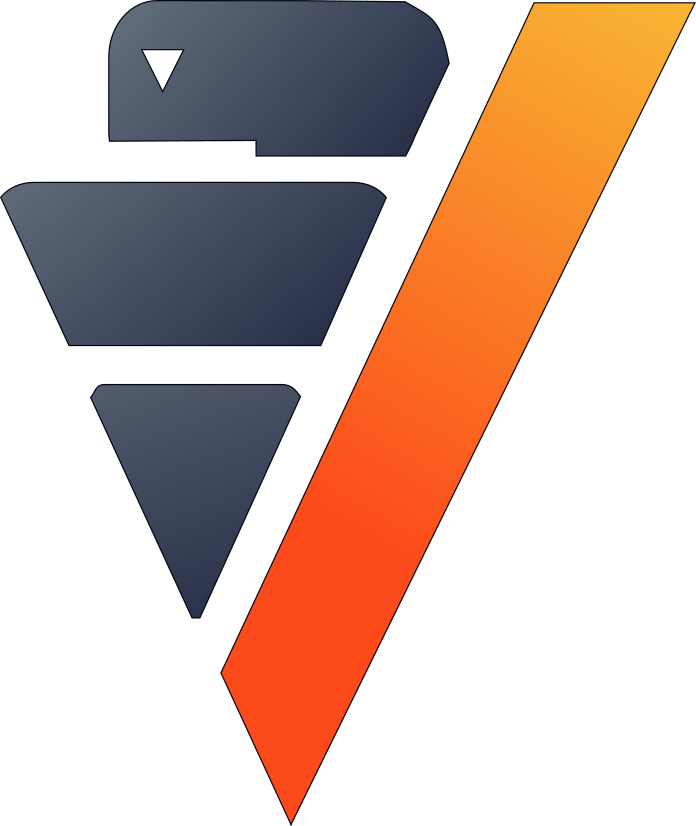

In [4]:
vdf["age"].fillna(method = "avg",
                  by = ["pclass", "sex"])
vdf["age"]

The features 'embarked' and 'fare' also have missing values. Instead of using a technique to impute them, we can just drop them with `dropna()`: 

```python
vdf["fare"].dropna()
vdf["embarked"].dropna()
```

1 element was filtered.
2 elements were filtered.


pclass    survived                                      name   \\
1           1           1                         Woolner, Mr. Hugh   \\
2           1           1           Williams, Mr. Richard Norris II   \\
3           1           1           Tucker, Mr. Gilbert Milligan Jr   \\
4           1           1               Thayer, Mr. John Borland Jr   \\
5           1           1                  Taylor, Mr. Elmer Zebley   \\
6           1           1           Stengel, Mr. Charles Emil Henry   \\
7           1           1                 Stahelin-Maeglin, Dr. Max   \\
8           1           1              Spedden, Mr. Frederic Oakley   \\
9           1           1           Spedden, Master. Robert Douglas   \\
10          1           1                Snyder, Mr. John Pillsbury   \\
11          1           1              Sloper, Mr. William Thompson   \\
12          1           1       Simonius-Blumer, Col. Oberst Alfons   \\
13          1           1          Silverthorne, Mr. Spencer Victor   \\
14          1           1               Seward, Mr. Frederic Kimber   \\
15          1           1                    Salomon, Mr. Abraham L   \\
16          1           1                     Saalfeld, Mr. Adolphe   \\
17          1           1               Ryerson, Master. John Borie   \\
18          1           1       Rheims, Mr. George Alexander Lucien   \\
19          1           1            Peuchen, Major. Arthur Godfrey   \\
20          1           1                 Omont, Mr. Alfred Fernand   \\
21          1           1                  Mock, Mr. Philipp Edmund   \\
22          1           1                 McGough, Mr. James Robert   \\
23          1           1                      Marechal, Mr. Pierre   \\
24          1           1                    Lesurer, Mr. Gustave J   \\
25          1           1              Kimball, Mr. Edwin Nelson Jr   \\
26          1           1                   Ismay, Mr. Joseph Bruce   \\
27          1           1              Hoyt, Mr. Frederick Maxfield   \\
28          1           1               Hawksford, Mr. Walter James   \\
29          1           1                        Hassab, Mr. Hammad   \\
30          1           1                 Harper, Mr. Henry Sleeper   \\
31          1           1               Harder, Mr. George Achilles   \\
32          1           1           Greenfield, Mr. William Bertram   \\
33          1           1                 Gracie, Col. Archibald IV   \\
34          1           1                  Goldenberg, Mr. Samuel L   \\
35          1           1          Frolicher-Stehli, Mr. Maxmillian   \\
36          1           1              Frauenthal, Mr. Isaac Gerald   \\
37          1           1             Frauenthal, Dr. Henry William   \\
38          1           1                 Dodge, Master. Washington   \\
39          1           1                     Dodge, Dr. Washington   \\
40          1           1                   Dick, Mr. Albert Adrian   \\
41          1           1               Daniel, Mr. Robert Williams   \\
42          1           1                    Daly, Mr. Peter Denis    \\
43          1           1                  Chevre, Mr. Paul Romaine   \\
44          1           1             Chambers, Mr. Norman Campbell   \\
45          1           1                Carter, Mr. William Ernest   \\
46          1           1       Carter, Master. William Thornton II   \\
47          1           1        Cardeza, Mr. Thomas Drake Martinez   \\
48          1           1         Calderhead, Mr. Edward Pennington   \\
49          1           1                          Blank, Mr. Henry   \\
50          1           1  Bjornstrom-Steffansson, Mr. Mauritz H...   \\
51          1           1                   Bishop, Mr. Dickinson H   \\
52          1           1                     Behr, Mr. Karl Howell   \\
53          1           1             Beckwith, Mr. Richard Leonard   \\
54          1           1      Barkworth, Mr. Algernon Henry Wils
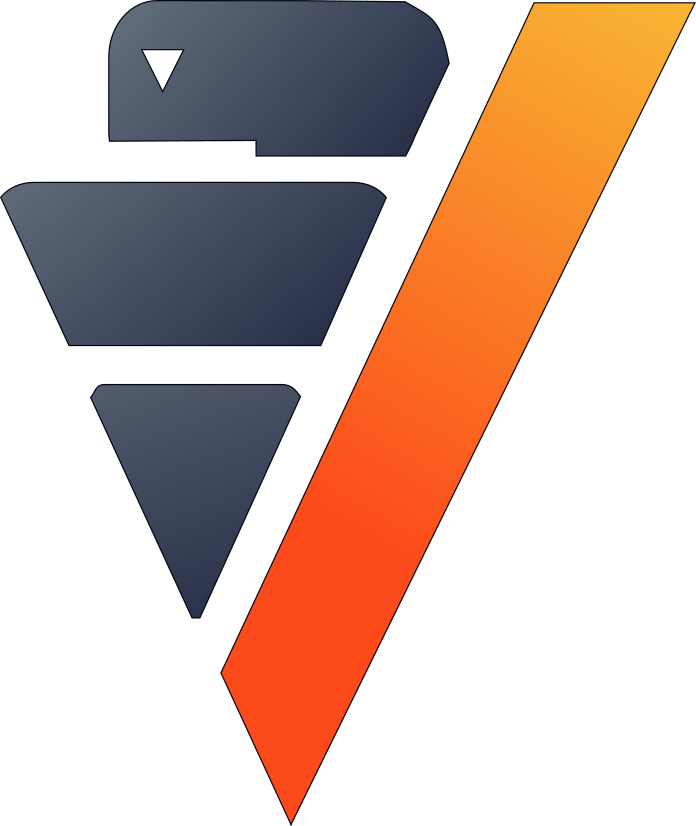

In [5]:
vdf["fare"].dropna()
vdf["embarked"].dropna()

<div class="alert alert-block alert-success">
<b>Want to learn more about missing values?</b> Check out the <a href="https://www.vertica.com/python/workshop/data_prep/missing_values/index.php">VerticaPy documentation</a>.
</div>

***

### Duplicates

<a id='h2_cell'></a>

Datasets often contain duplicates, sometimes intentional, sometimes mistakes. In either case, the first step is to check if duplicates exist:

```python
vdf.duplicated()
```

pclass    survived    name    sex    age    sibsp   \\
     parch    ticket    fare    cabin    embarked   \\
     boat    body    home.dest    occurrence  
Rows: 0 | Columns: 15
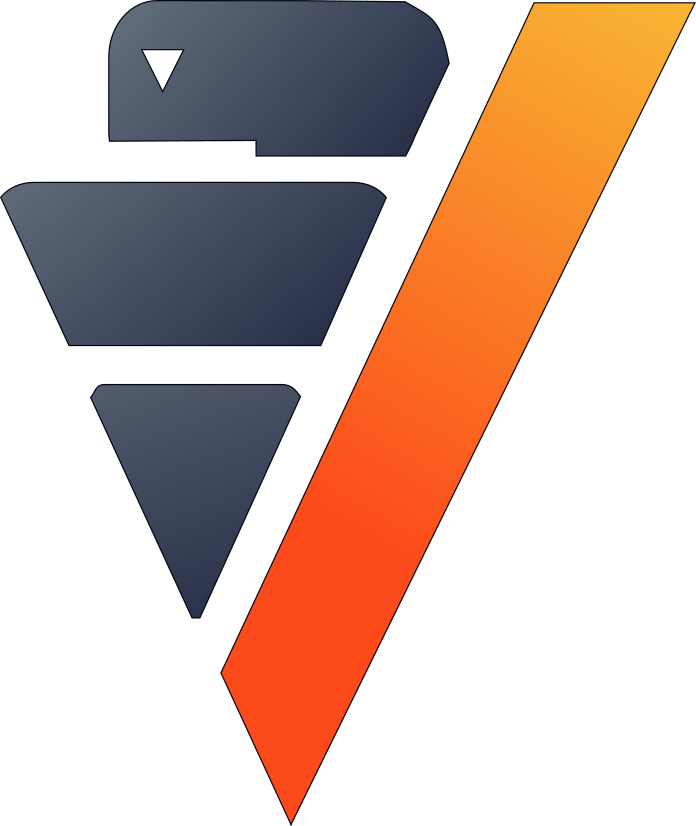

In [6]:
vdf.duplicated()

There are no duplicates in the current dataset, but for the purposes of this lesson, let's manually add some with `append()` to add the table to itself:

```python
vdf=vdf.append(vdf)
vdf.shape()
```

In [7]:
vdf=vdf.append(vdf)
vdf.shape()

(2462, 14)

Predictably, this doubles the total number of records from 1234 to 2468, where 1234 are duplicates:

```python
vdf.duplicated()
```

pclass    survived                                      name   \\
1          3           1                   de Mulder, Mr. Theodore   \\
2          3           1  de Messemaeker, Mrs. Guillaume Joseph...   \\
3          3           1      de Messemaeker, Mr. Guillaume Joseph   \\
4          3           1   Yasbeck, Mrs. Antoni (Selini Alexander)   \\
5          3           1          Wilkes, Mrs. James (Ellen Needs)   \\
6          3           1  Whabee, Mrs. George Joseph (Shawneene...   \\
7          3           1                      Vartanian, Mr. David   \\
8          3           1                    Turkula, Mrs. (Hedwig)   \\
9          3           1                   Turja, Miss. Anna Sofia   \\
10         3           1   Touma, Mrs. Darwis (Hanne Youssef Razi)   \\
11         3           1                Touma, Miss. Maria Youssef   \\
12         3           1            Touma, Master. Georges Youssef   \\
13         3           1              Tornquist, Mr. William Henry   \\
14         3           1  Thorneycroft, Mrs. Percival (Florence...   \\
15         3           1           Thomas, Master. Assad Alexander   \\
16         3           1                Tenglin, Mr. Gunnar Isidor   \\
17         3           1                Svensson, Mr. Johan Cervin   \\
18         3           1                 Sundman, Mr. Johan Julian   \\
19         3           1            Sunderland, Mr. Victor Francis   \\
20         3           1                        Stranden, Mr. Juho   \\
21         3           1           Stanley, Miss. Amy Zillah Elsie   \\
22         3           1                        Smyth, Miss. Julia   \\
23         3           1                 Sjoblom, Miss. Anna Sofia   \\
24         3           1                Shine, Miss. Ellen Natalia   \\
25         3           1               Sheerlinck, Mr. Jan Baptist   \\
26         3           1                           Sap, Mr. Julius   \\
27         3           1  Sandstrom, Mrs. Hjalmar (Agnes Charlo...   \\
28         3           1           Sandstrom, Miss. Marguerite Rut   \\
29         3           1           Sandstrom, Miss. Beatrice Irene   \\
30         3           1          Salkjelsvik, Miss. Anna Kristine   \\
...      ...         ...                                       ...   \\
         sex                 age    sibsp    parch               ticket   \\
1       male                30.0        0        0               345774   \\
2     female                36.0        1        0               345572   \\
3       male                36.5        1        0               345572   \\
4     female                15.0        1        0                 2659   \\
5     female                47.0        1        0               363272   \\
6     female                38.0        0        0                 2688   \\
7       male                22.0        0        0                 2658   \\
8     female                63.0        0        0                 4134   \\
9     female                18.0        0        0                 4138   \\
10    female                29.0        0        2                 2650   \\
11    female                 9.0        1        1                 2650   \\
12      male                 7.0        1        1                 2650   \\
13      male                25.0        0        0                 LINE   \\
14    female    22.5766423357664        1        0               376564   \\
15      male                0.42        0        1                 2625   \\
16      male                25.0        0        0               350033   \\
17      male                14.0        0        0                 7538   \\
18      male                44.0        0        0    STON/O 2. 3101269   \\
19      male                16.0        0        0      SOTON/OQ 392089   \\
20      male                31.0        0        0    STON/O 2. 3101288   \\
21    female                23.0        0        0             CA. 2314   \\
22    fe
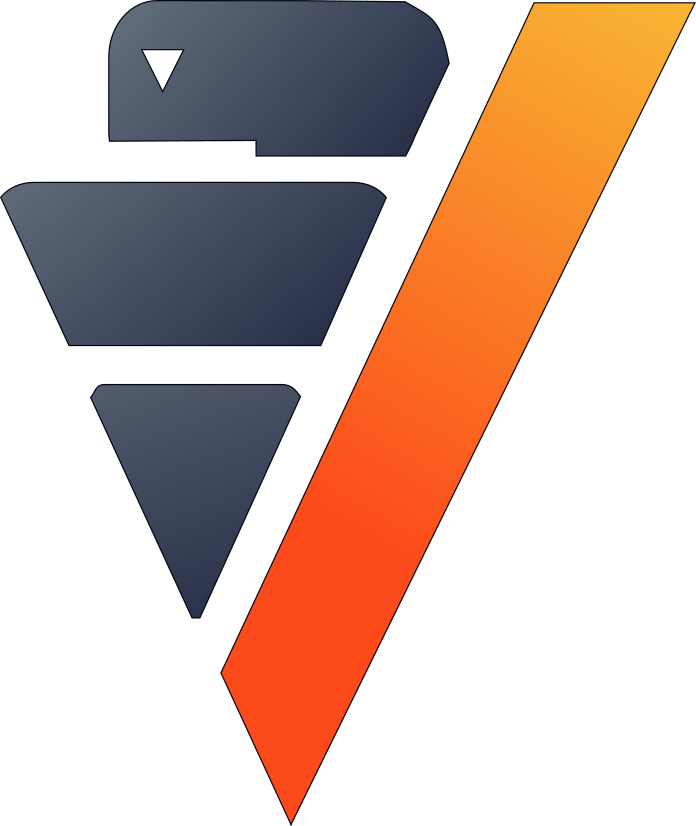

In [8]:
vdf.duplicated()

To drop the duplicates, use <a href="https://www.vertica.com/python/documentation_last/vdataframe/main-methods/drop_duplicates/">`drop_duplicates()`</a>. You should not drop duplicates in all cases (for example, in datasets where duplicates represent frequency), but we know it is safe to do so in this case:

```python
vdf.drop_duplicates()
```


1231 elements were filtered.


pclass    survived                                      name   \\
1           1           0  Allison, Mrs. Hudson J C (Bessie Wald...   \\
2           1           0                   Artagaveytia, Mr. Ramon   \\
3           1           0                  Borebank, Mr. John James   \\
4           1           0                     Cairns, Mr. Alexander   \\
5           1           0                  Carlsson, Mr. Frans Olof   \\
6           1           0                 Crafton, Mr. John Bertram   \\
7           1           0               Franklin, Mr. Thomas Parham   \\
8           1           0               Harris, Mr. Henry Birkhardt   \\
9           1           0                     Harrison, Mr. William   \\
10          1           0                   Kent, Mr. Edward Austin   \\
11          1           0                        Klaber, Mr. Herman   \\
12          1           0                   McCarthy, Mr. Timothy J   \\
13          1           0                 Millet, Mr. Francis Davis   \\
14          1           0                     Natsch, Mr. Charles H   \\
15          1           0           Reuchlin, Jonkheer. John George   \\
16          1           0                       Ringhini, Mr. Sante   \\
17          1           0                       Ross, Mr. John Hugo   \\
18          1           0                     Stewart, Mr. Albert A   \\
19          1           0                         Taussig, Mr. Emil   \\
20          1           0               White, Mr. Percival Wayland   \\
21          1           0                 Widener, Mr. Harry Elkins   \\
22          1           1  Astor, Mrs. John Jacob (Madeleine Tal...   \\
23          1           1             Beckwith, Mr. Richard Leonard   \\
24          1           1   Bishop, Mrs. Dickinson H (Helen Walton)   \\
25          1           1                    Bissette, Miss. Amelia   \\
26          1           1                   Bonnell, Miss. Caroline   \\
27          1           1                 Carter, Miss. Lucile Polk   \\
28          1           1  Chambers, Mrs. Norman Campbell (Berth...   \\
29          1           1                  Chevre, Mr. Paul Romaine   \\
30          1           1  Cornell, Mrs. Robert Clifford (Malvin...   \\
31          1           1  Crosby, Mrs. Edward Gifford (Catherin...   \\
32          1           1                    Daly, Mr. Peter Denis    \\
33          1           1               Daniel, Mr. Robert Williams   \\
34          1           1      Davidson, Mrs. Thornton (Orian Hays)   \\
35          1           1                     Dodge, Dr. Washington   \\
36          1           1      Flegenheim, Mrs. Alfred (Antoinette)   \\
37          1           1              Frauenthal, Mr. Isaac Gerald   \\
38          1           1        Frolicher, Miss. Hedwig Margaritha   \\
39          1           1            Gibson, Miss. Dorothy Winifred   \\
40          1           1                  Goldenberg, Mr. Samuel L   \\
41          1           1                 Gracie, Col. Archibald IV   \\
42          1           1  Hays, Mrs. Charles Melville (Clara Je...   \\
43          1           1              Hippach, Miss. Jean Gertrude   \\
44          1           1                     Maioni, Miss. Roberta   \\
45          1           1                    Minahan, Miss. Daisy E   \\
46          1           1  Minahan, Mrs. William Edward (Lillian...   \\
47          1           1       Simonius-Blumer, Col. Oberst Alfons   \\
48          1           1           Spedden, Master. Robert Douglas   \\
49          1           1              Spedden, Mr. Frederic Oakley   \\
50          1           1                       Taussig, Miss. Ruth   \\
51          1           1    Taussig, Mrs. Emil (Tillie Mandelbaum)   \\
52          1           1               Thayer, Mr. John Borland Jr   \\
53          1           1  Warren, Mrs. Frank Manley (Anna Sophi...   \\
54          1           1           Williams, Mr. Richard Norris 
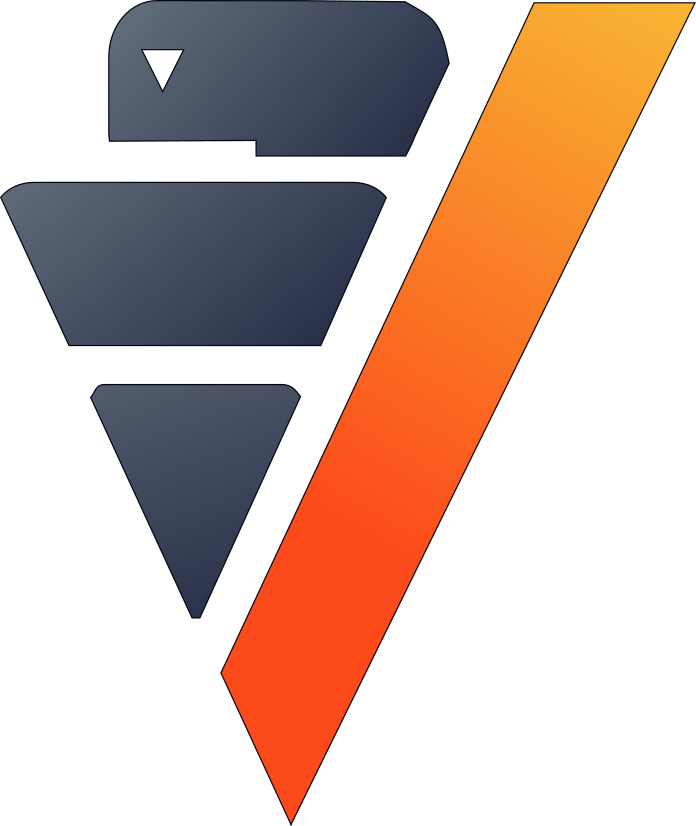

In [9]:
vdf.drop_duplicates()

Confirm that the duplicate records were dropped by looking at the record count:

```python
vdf.shape()
```

In [10]:
vdf.shape()

(1231, 14)

***

<a id='h3_cell'></a>
### Normalization


Most machine learning algorithms are very sensitive to unnormalized data, so it is important to normalize them before analysis. For example, the neighbors-based and k-means algorithms use the p-distance in their learning phase. You shoudl also normalize your data before using linear regression to adhere to the Gauss-Markov assumptions.

Normalization is also a way to encode the data and to retain the global distribution. The process is also reversible; if we know the estimators to use to normalize the data, we can easily unnormalize the data and come back to the original distribution.

There are three main normalization techniques:

* <b>Z-Score</b>: Reduce and center the feature values using the average and standard deviation. This technique is sensitive to outliers.
* <b>Robust Z-Score</b>: Reduce and center the feature values using the median and the median absolute deviation. This technique is robust to outliers.
* <b>Min-Max</b>: Reduce the feature values by using a bijection to [0,1], where the maximum value is 1 and the minimum is 0. This technique is robust to outliers.

Continuing with the Titanic dataset, there are two numeric columns that might be good candidates for normalization: age and fare. You can use `min()` and `max()` to get their ranges:

```python
vdf["age", "fare"].min()
```

min  
"age"       0.33  
"fare"       0.0  
Rows: 1-2 | Columns: 2
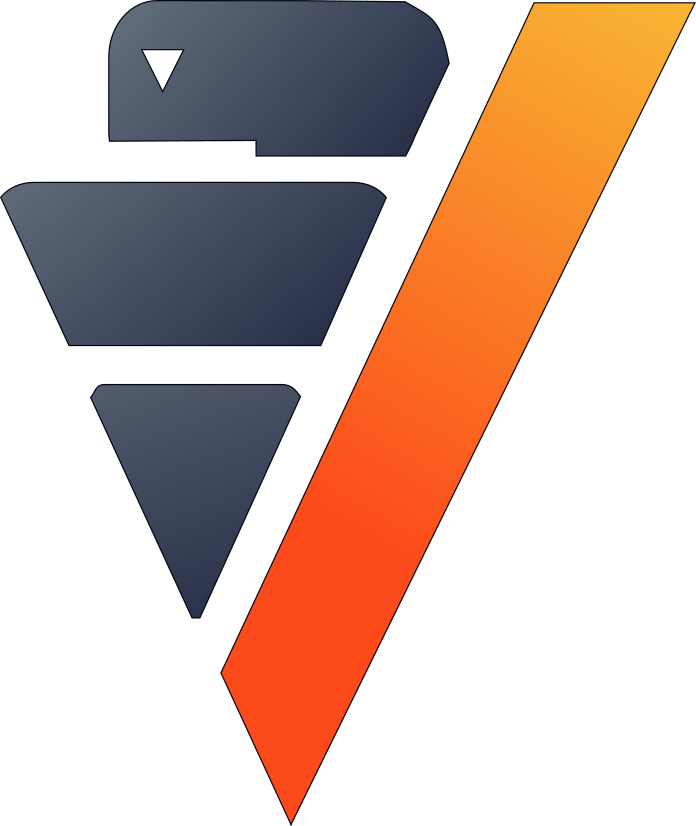

In [11]:
vdf["age", "fare"].min()

```python
vdf["age", "fare"].max()
```

max  
"age"           80.0  
"fare"      512.3292  
Rows: 1-2 | Columns: 2
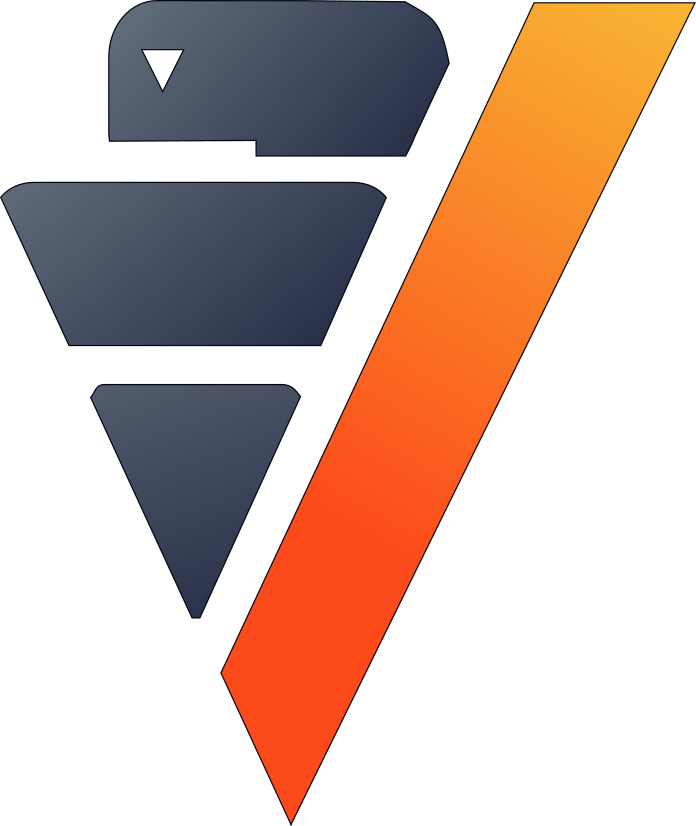

In [12]:
vdf["age", "fare"].max()

While the minimum values for both features is almost equal, the maximum values differ by much more. Though the difference in their ranges is not too significant in this case, datasets may have differences by several orders of magnitude.

However, the way we handle them is not affected by the significance of this difference; we can still use `normalize()`, specifying the `minmax` method to normalize both the columns so that their values are between 0 and 1, inclusive:

```python
vdf["age"].normalize(method = "minmax")
vdf["fare"].normalize(method = "minmax")
```


pclass    survived                                      name   \\
1           1           0              Allison, Miss. Helen Loraine   \\
2           1           0                       Baumann, Mr. John D   \\
3           1           0                       Birnbaum, Mr. Jakob   \\
4           1           0              Blackwell, Mr. Stephen Weart   \\
5           1           0                        Brandeis, Mr. Emil   \\
6           1           0                  Carlsson, Mr. Frans Olof   \\
7           1           0               Clifford, Mr. George Quincy   \\
8           1           0                 Crafton, Mr. John Bertram   \\
9           1           0                 Cumings, Mr. John Bradley   \\
10          1           0                         Fortune, Mr. Mark   \\
11          1           0                 Harrington, Mr. Charles H   \\
12          1           0                Isham, Miss. Ann Elizabeth   \\
13          1           0                Jones, Mr. Charles Cresson   \\
14          1           0                   Kenyon, Mr. Frederick R   \\
15          1           0                   McCarthy, Mr. Timothy J   \\
16          1           0                   Meyer, Mr. Edgar Joseph   \\
17          1           0              Nicholson, Mr. Arthur Ernest   \\
18          1           0            Ostby, Mr. Engelhart Cornelius   \\
19          1           0             Parr, Mr. William Henry Marsh   \\
20          1           0                Payne, Mr. Vivian Ponsonby   \\
21          1           0                 Pears, Mr. Thomas Clinton   \\
22          1           0  Penasco y Castellana, Mr. Victor de S...   \\
23          1           0                       Ringhini, Mr. Sante   \\
24          1           0                Smith, Mr. Richard William   \\
25          1           0                        Straus, Mr. Isidor   \\
26          1           0    Straus, Mrs. Isidor (Rosalie Ida Blun)   \\
27          1           0                     Sutton, Mr. Frederick   \\
28          1           0               White, Mr. Percival Wayland   \\
29          1           0                  Wick, Mr. George Dennick   \\
30          1           0    Williams-Lambert, Mr. Fletcher Fellows   \\
31          1           0                        Wright, Mr. George   \\
32          1           1  Astor, Mrs. John Jacob (Madeleine Tal...   \\
33          1           1                     Bidois, Miss. Rosalie   \\
34          1           1                   Bishop, Mr. Dickinson H   \\
35          1           1  Bjornstrom-Steffansson, Mr. Mauritz H...   \\
36          1           1                          Blank, Mr. Henry   \\
37          1           1                  Bowen, Miss. Grace Scott   \\
38          1           1  Brown, Mrs. John Murray (Caroline Lan...   \\
39          1           1  Bucknell, Mrs. William Robert (Emma E...   \\
40          1           1         Calderhead, Mr. Edward Pennington   \\
41          1           1       Carter, Master. William Thornton II   \\
42          1           1  Chaffee, Mrs. Herbert Fuller (Carrie ...   \\
43          1           1  Chambers, Mrs. Norman Campbell (Berth...   \\
44          1           1               Compton, Miss. Sara Rebecca   \\
45          1           1                   Crosby, Miss. Harriet R   \\
46          1           1               Daniel, Mr. Robert Williams   \\
47          1           1  Dick, Mrs. Albert Adrian (Vera Gilles...   \\
48          1           1                     Dodge, Dr. Washington   \\
49          1           1             Frauenthal, Dr. Henry William   \\
50          1           1              Frauenthal, Mr. Isaac Gerald   \\
51          1           1  Frolicher-Stehli, Mrs. Maxmillian (Ma...   \\
52          1           1           Greenfield, Mr. William Bertram   \\
53          1           1                 Harper, Mr. Henry Sleeper   \\
54          1           1              Hippach, Miss. Jean Gertru
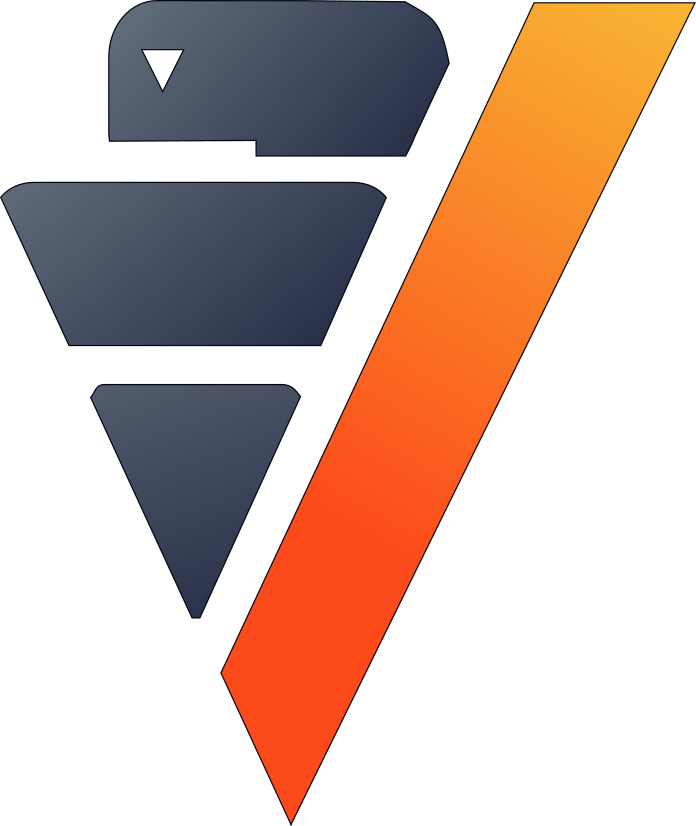

In [13]:
vdf["age"].normalize(method = "minmax")
vdf["fare"].normalize(method = "minmax")


Let's look at the new minimum and maximum values:

```python
vdf.select(["age", "fare"])
vdf["age", "fare"].min()
vdf["age", "fare"].max()
```

max  
"age"       1.0  
"fare"      1.0  
Rows: 1-2 | Columns: 2
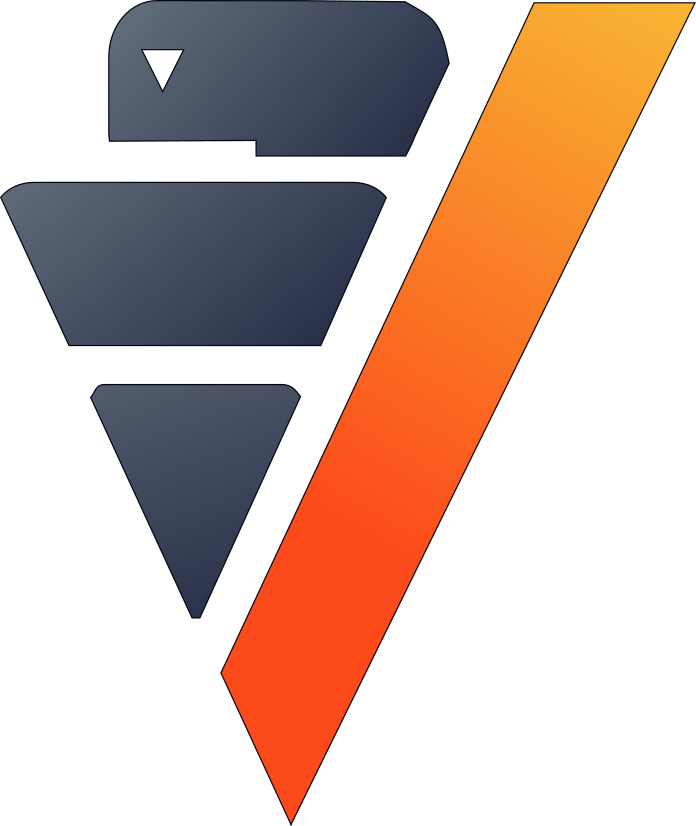

In [14]:
vdf.select(["age", "fare"])
vdf["age", "fare"].min()
vdf["age", "fare"].max()

The age and fare columns have been successfully normalized.

<div class="alert alert-block alert-success">
    <b>Did you know?</b> If you need help with a function, you can call <b><i>help()</i></b> function, specifying the function you want help with: `help(vp.vDataFrame.normalize)`
</div>

***

<a id='h3_cell'></a>
### Simple Joins

Data science problems are rarely limited to a single dataset; oftentimes you will need to merge data from several different sources, which requires keys on which to join the datasets.

This section uses the [2015 Flight Delays and Cancellations](https://www.kaggle.com/datasets/usdot/flight-delays) dataset, which contains three datasets:

1. Flight data
2. Airport data
3. Airline data

Start by reading each of these files into their own vDataFrames:

```python
flights=vp.read_csv('flights.csv')
airports=vp.read_csv('airports.csv')
airlines=vp.read_csv('airlines.csv')
```



In [16]:
import verticapy as vp
flights=vp.read_csv('/project/data/DataScienceEssentials/flights.csv')
airports=vp.read_csv('/project/data/DataScienceEssentials/airports.csv')
airlines=vp.read_csv('/project/data/DataScienceEssentials/airlines.csv')

Examine their tables:

```python
flights
```

YEAR    MONTH    DAY    DAY_OF_WEEK    AIRLINE   \\
1      2015        1      1              4         AA   \\
2      2015        1      1              4         AA   \\
3      2015        1      1              4         AA   \\
4      2015        1      1              4         AA   \\
5      2015        1      1              4         AA   \\
6      2015        1      1              4         AA   \\
7      2015        1      1              4         AA   \\
8      2015        1      1              4         AA   \\
9      2015        1      1              4         AA   \\
10     2015        1      1              4         AA   \\
11     2015        1      1              4         AA   \\
12     2015        1      1              4         AA   \\
13     2015        1      1              4         AA   \\
14     2015        1      1              4         AA   \\
15     2015        1      1              4         AA   \\
16     2015        1      1              4         AA   \\
17     2015        1      1              4         AA   \\
18     2015        1      1              4         AA   \\
19     2015        1      1              4         AA   \\
20     2015        1      1              4         AA   \\
21     2015        1      1              4         AA   \\
22     2015        1      1              4         AA   \\
23     2015        1      1              4         AA   \\
24     2015        1      1              4         AA   \\
25     2015        1      1              4         AA   \\
26     2015        1      1              4         AA   \\
27     2015        1      1              4         AA   \\
28     2015        1      1              4         AA   \\
29     2015        1      1              4         AA   \\
30     2015        1      1              4         AA   \\
31     2015        1      1              4         AA   \\
32     2015        1      1              4         AA   \\
33     2015        1      1              4         AA   \\
34     2015        1      1              4         AA   \\
35     2015        1      1              4         AA   \\
36     2015        1      1              4         AA   \\
37     2015        1      1              4         AA   \\
38     2015        1      1              4         AA   \\
39     2015        1      1              4         AA   \\
40     2015        1      1              4         AA   \\
41     2015        1      1              4         AA   \\
42     2015        1      1              4         AA   \\
43     2015        1      1              4         AA   \\
44     2015        1      1              4         AA   \\
45     2015        1      1              4         AA   \\
46     2015        1      1              4         AA   \\
47     2015        1      1              4         AA   \\
48     2015        1      1              4         AA   \\
49     2015        1      1              4         AA   \\
50     2015        1      1              4         AA   \\
51     2015        1      1              4         AA   \\
52     2015        1      1              4         AA   \\
53     2015        1      1              4         AA   \\
54     2015        1      1              4         AA   \\
55     2015        1      1              4         AA   \\
56     2015        1      1              4         AA   \\
57     2015        1      1              4         AA   \\
58     2015        1      1              4         AA   \\
59     2015        1      1              4         AA   \\
60     2015        1      1              4         AA   \\
61     2015        1      1              4         AA   \\
62     2015        1      1              4         AA   \\
63     2015        1      1              4         AA   \\
64     2015        1      1              4         AA   \\
65     2015        1      1              4         AA   \\
66     2015        1      1              4         AA   \\
67     2015        1      1              4         AA 
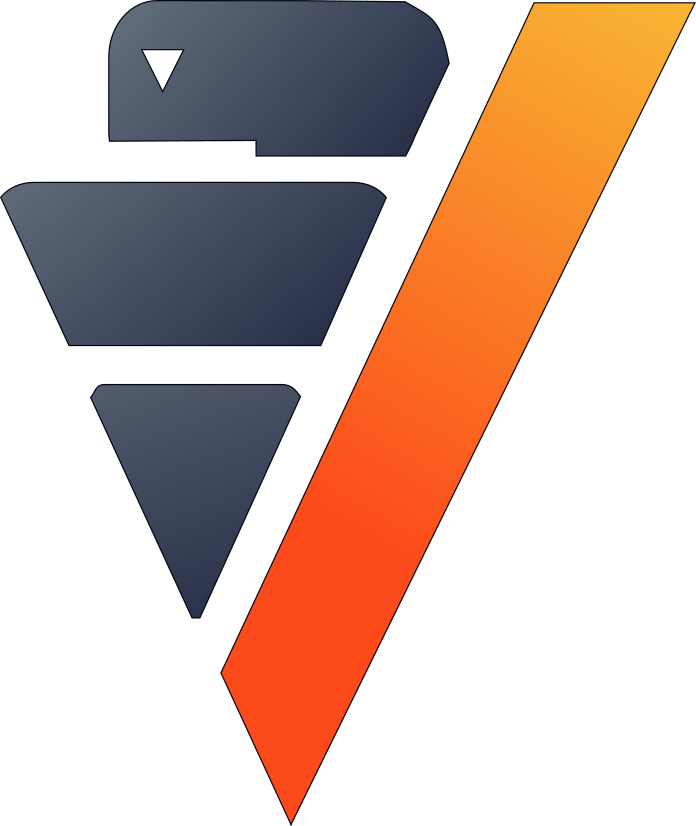

In [18]:
flights

```python
airports
```

IATA_CODE                                   AIRPORT                     CITY   \\
1            ABE       Lehigh Valley International Airport                Allentown   \\
2            ABI                  Abilene Regional Airport                  Abilene   \\
3            ABQ         Albuquerque International Sunport              Albuquerque   \\
4            ABR                 Aberdeen Regional Airport                 Aberdeen   \\
5            ABY        Southwest Georgia Regional Airport                   Albany   \\
6            ACK                Nantucket Memorial Airport                Nantucket   \\
7            ACT                     Waco Regional Airport                     Waco   \\
8            ACV                            Arcata Airport            Arcata/Eureka   \\
9            ACY       Atlantic City International Airport            Atlantic City   \\
10           ADK                              Adak Airport                     Adak   \\
11           ADQ                            Kodiak Airport                   Kodiak   \\
12           AEX          Alexandria International Airport               Alexandria   \\
13           AGS     Augusta Regional Airport (Bush Field)                  Augusta   \\
14           AKN                       King Salmon Airport              King Salmon   \\
15           ALB              Albany International Airport                   Albany   \\
16           ALO                 Waterloo Regional Airport                 Waterloo   \\
17           AMA  Rick Husband Amarillo International A...                 Amarillo   \\
18           ANC  Ted Stevens Anchorage International A...                Anchorage   \\
19           APN            Alpena County Regional Airport                   Alpena   \\
20           ASE               Aspen-Pitkin County Airport                    Aspen   \\
21           ATL  Hartsfield-Jackson Atlanta Internatio...                  Atlanta   \\
22           ATW            Appleton International Airport                 Appleton   \\
23           AUS    Austin-Bergstrom International Airport                   Austin   \\
24           AVL                Asheville Regional Airport                Asheville   \\
25           AVP  Wilkes-Barre/Scranton International A...    Wilkes-Barre/Scranton   \\
26           AZO  Kalamazoo/Battle Creek International ...                Kalamazoo   \\
27           BDL             Bradley International Airport            Windsor Locks   \\
28           BET                            Bethel Airport                   Bethel   \\
29           BFL                             Meadows Field              Bakersfield   \\
30           BGM                Greater Binghamton Airport               Binghamton   \\
31           BGR              Bangor International Airport                   Bangor   \\
32           BHM  Birmingham-Shuttlesworth Internationa...               Birmingham   \\
33           BIL      Billings Logan International Airport                 Billings   \\
34           BIS                Bismarck Municipal Airport                 Bismarck   \\
35           BJI                  Bemidji Regional Airport                  Bemidji   \\
36           BLI          Bellingham International Airport               Bellingham   \\
37           BMI  Central Illinois Regional Airport at ...              Bloomington   \\
38           BNA           Nashville International Airport                Nashville   \\
39           BOI        Boise Airport (Boise Air Terminal)                    Boise   \\
40           BOS  Gen. Edward Lawrence Logan Internatio...                   Boston   \\
41           BPT  Jack Brooks Regional Airport (Southea...     Beaumont/Port Arthur   \\
42           BQK            Brunswick Golden Isles Airport                Brunswick   \\
43           BQN                  Rafael Hernández Airport                Aguadilla   \\
44           BRD           Brainerd Lakes Regional Airport                 Brainerd   \\
45
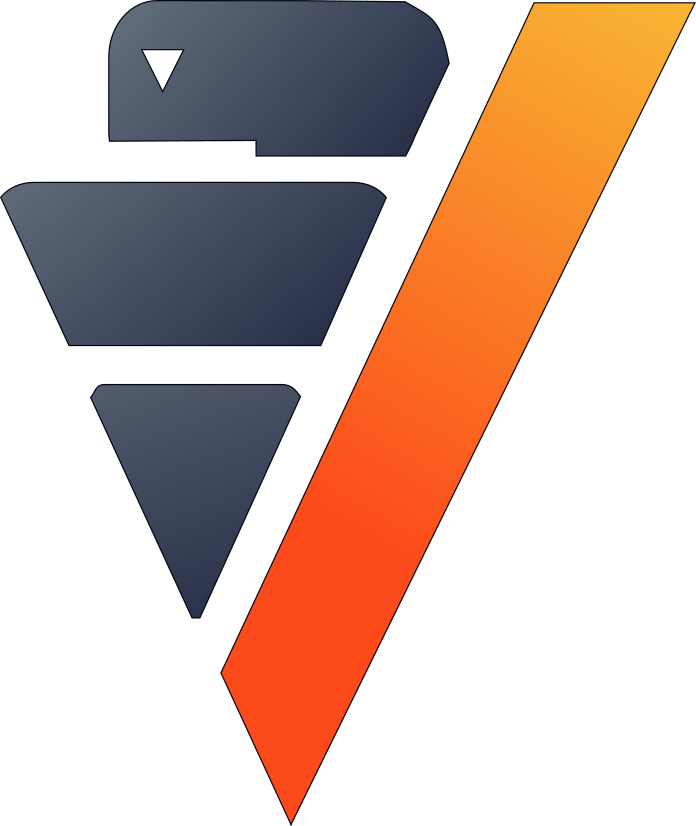

In [19]:
airports

```python
airlines
```

IATA_CODE                         AIRLINE  
1            AA          American Airlines Inc.  
2            AS            Alaska Airlines Inc.  
3            B6                 JetBlue Airways  
4            DL            Delta Air Lines Inc.  
5            EV     Atlantic Southeast Airlines  
6            F9          Frontier Airlines Inc.  
7            HA          Hawaiian Airlines Inc.  
8            MQ    American Eagle Airlines Inc.  
9            NK                Spirit Air Lines  
10           OO           Skywest Airlines Inc.  
11           UA           United Air Lines Inc.  
12           US                 US Airways Inc.  
13           VX                  Virgin America  
14           WN          Southwest Airlines Co.  
Rows: 1-14 | Columns: 2
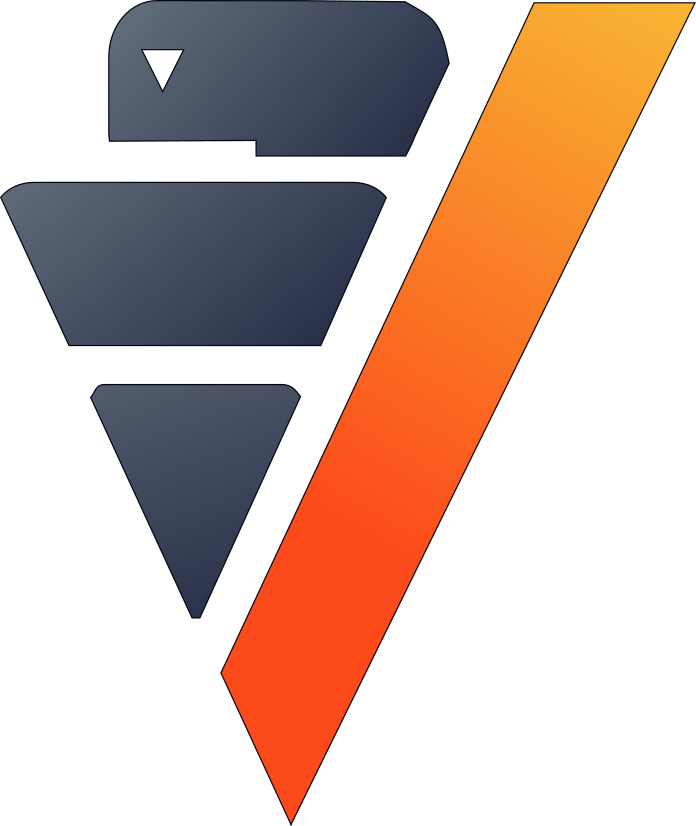

In [20]:
airlines

Each of these tables contain unique keys that we can use to join them.

Join the airline table with the flights table using the IATA_CODE and AIRLINE columns from the airlines and flights tables, respectively:

```python
flights = flights.join(airlines,
                       how = "left",
                       on = {"airline": "IATA_CODE"},
                       expr2 = ["AIRLINE AS airline_long"])
display(flights)
```

YEAR    MONTH    DAY    DAY_OF_WEEK    AIRLINE   \\
1      2015        1      1              4         AA   \\
2      2015        1      1              4         AA   \\
3      2015        1      1              4         AA   \\
4      2015        1      1              4         AA   \\
5      2015        1      1              4         AA   \\
6      2015        1      1              4         AA   \\
7      2015        1      1              4         AA   \\
8      2015        1      1              4         AA   \\
9      2015        1      1              4         AA   \\
10     2015        1      1              4         AA   \\
11     2015        1      1              4         AA   \\
12     2015        1      1              4         AA   \\
13     2015        1      1              4         AA   \\
14     2015        1      1              4         AA   \\
15     2015        1      1              4         AA   \\
16     2015        1      1              4         AA   \\
17     2015        1      1              4         AA   \\
18     2015        1      1              4         AA   \\
19     2015        1      1              4         AA   \\
20     2015        1      1              4         AA   \\
21     2015        1      1              4         AA   \\
22     2015        1      1              4         AA   \\
23     2015        1      1              4         AA   \\
24     2015        1      1              4         AA   \\
25     2015        1      1              4         AA   \\
26     2015        1      1              4         AA   \\
27     2015        1      1              4         AA   \\
28     2015        1      1              4         AA   \\
29     2015        1      1              4         AA   \\
30     2015        1      1              4         AA   \\
31     2015        1      1              4         AA   \\
32     2015        1      1              4         AA   \\
33     2015        1      1              4         AA   \\
34     2015        1      1              4         AA   \\
35     2015        1      1              4         AA   \\
36     2015        1      1              4         AA   \\
37     2015        1      1              4         AA   \\
38     2015        1      1              4         AA   \\
39     2015        1      1              4         AA   \\
40     2015        1      1              4         AA   \\
41     2015        1      1              4         AA   \\
42     2015        1      1              4         AA   \\
43     2015        1      1              4         AA   \\
44     2015        1      1              4         AA   \\
45     2015        1      1              4         AA   \\
46     2015        1      1              4         AA   \\
47     2015        1      1              4         AA   \\
48     2015        1      1              4         AA   \\
49     2015        1      1              4         AA   \\
50     2015        1      1              4         AA   \\
51     2015        1      1              4         AA   \\
52     2015        1      1              4         AA   \\
53     2015        1      1              4         AA   \\
54     2015        1      1              4         AA   \\
55     2015        1      1              4         AA   \\
56     2015        1      1              4         AA   \\
57     2015        1      1              4         AA   \\
58     2015        1      1              4         AA   \\
59     2015        1      1              4         AA   \\
60     2015        1      1              4         AA   \\
61     2015        1      1              4         AA   \\
62     2015        1      1              4         AA   \\
63     2015        1      1              4         AA   \\
64     2015        1      1              4         AA   \\
65     2015        1      1              4         AA   \\
66     2015        1      1              4         AA   \\
67     2015        1      1              4         AA 
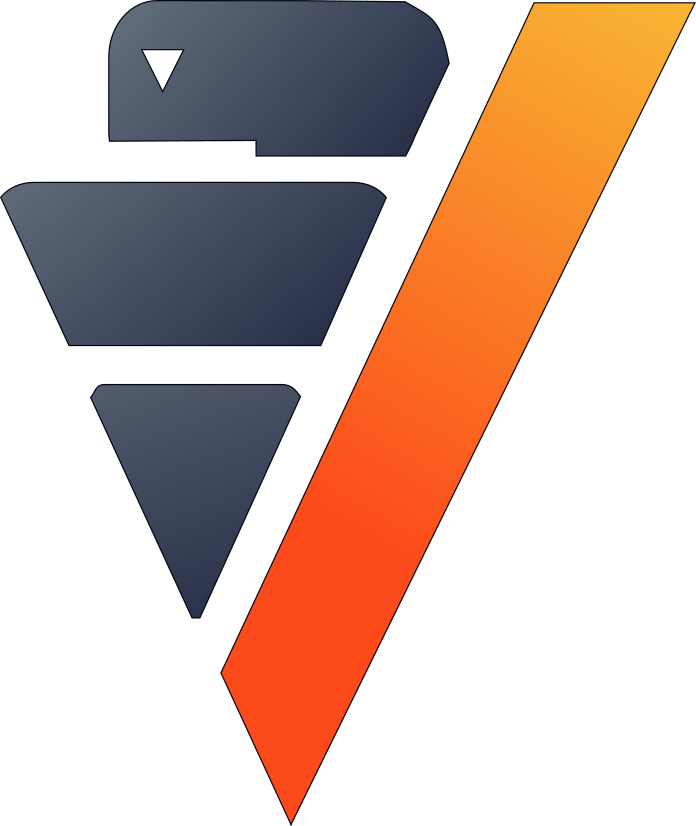

In [21]:
flights = flights.join(airlines,
                       how = "left",
                       on = {"airline": "IATA_CODE"},
                       expr2 = ["AIRLINE AS airline_long"])
display(flights)

In another join, we can try to merge the airports table:

```python
flights = flights.join(airports,
                       how = "left",
                       on = {"origin_airport": "IATA_CODE"},
                       expr2 = ["LATITUDE AS origin_lat",
                                "LONGITUDE AS origin_lon"])
flights = flights.join(airports,
                       how = "left",
                       on = {"destination_airport": "IATA_CODE"},
                       expr2 = ["LATITUDE AS destination_lat",
                                "LONGITUDE AS destination_lon"])
display(flights)
```

YEAR    MONTH    DAY    DAY_OF_WEEK    AIRLINE   \\
1      2015        1      1              4         AA   \\
2      2015        1      1              4         AA   \\
3      2015        1      1              4         AA   \\
4      2015        1      1              4         AA   \\
5      2015        1      1              4         AA   \\
6      2015        1      1              4         AA   \\
7      2015        1      1              4         AA   \\
8      2015        1      1              4         AA   \\
9      2015        1      1              4         AA   \\
10     2015        1      1              4         AA   \\
11     2015        1      1              4         AA   \\
12     2015        1      1              4         AA   \\
13     2015        1      1              4         AA   \\
14     2015        1      1              4         AA   \\
15     2015        1      1              4         AA   \\
16     2015        1      1              4         AA   \\
17     2015        1      1              4         AA   \\
18     2015        1      1              4         AA   \\
19     2015        1      1              4         AA   \\
20     2015        1      1              4         AA   \\
21     2015        1      1              4         AA   \\
22     2015        1      1              4         AA   \\
23     2015        1      1              4         AA   \\
24     2015        1      1              4         AA   \\
25     2015        1      1              4         AA   \\
26     2015        1      1              4         AA   \\
27     2015        1      1              4         AA   \\
28     2015        1      1              4         AA   \\
29     2015        1      1              4         AA   \\
30     2015        1      1              4         AA   \\
31     2015        1      1              4         AA   \\
32     2015        1      1              4         AA   \\
33     2015        1      1              4         AA   \\
34     2015        1      1              4         AA   \\
35     2015        1      1              4         AA   \\
36     2015        1      1              4         AA   \\
37     2015        1      1              4         AA   \\
38     2015        1      1              4         AA   \\
39     2015        1      1              4         AA   \\
40     2015        1      1              4         AA   \\
41     2015        1      1              4         AA   \\
42     2015        1      1              4         AA   \\
43     2015        1      1              4         AA   \\
44     2015        1      1              4         AA   \\
45     2015        1      1              4         AA   \\
46     2015        1      1              4         AA   \\
47     2015        1      1              4         AA   \\
48     2015        1      1              4         AA   \\
49     2015        1      1              4         AA   \\
50     2015        1      1              4         AA   \\
51     2015        1      1              4         AA   \\
52     2015        1      1              4         AA   \\
53     2015        1      1              4         AA   \\
54     2015        1      1              4         AA   \\
55     2015        1      1              4         AA   \\
56     2015        1      1              4         AA   \\
57     2015        1      1              4         AA   \\
58     2015        1      1              4         AA   \\
59     2015        1      1              4         AA   \\
60     2015        1      1              4         AA   \\
61     2015        1      1              4         AA   \\
62     2015        1      1              4         AA   \\
63     2015        1      1              4         AA   \\
64     2015        1      1              4         AA   \\
65     2015        1      1              4         AA   \\
66     2015        1      1              4         AA   \\
67     2015        1      1              4         AA 
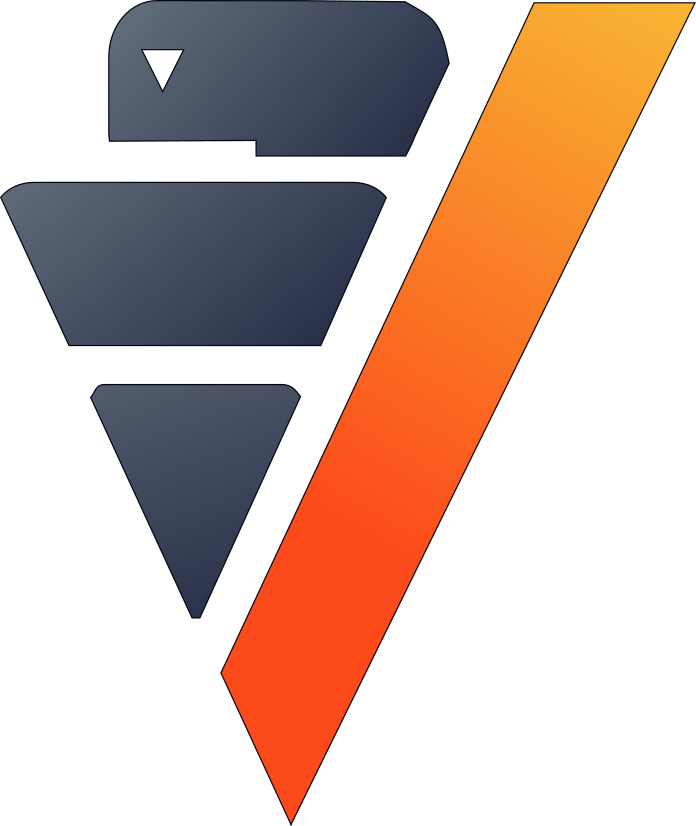

In [22]:
flights = flights.join(airports,
                       how = "left",
                       on = {"origin_airport": "IATA_CODE"},
                       expr2 = ["LATITUDE AS origin_lat",
                                "LONGITUDE AS origin_lon"])
flights = flights.join(airports,
                       how = "left",
                       on = {"destination_airport": "IATA_CODE"},
                       expr2 = ["LATITUDE AS destination_lat",
                                "LONGITUDE AS destination_lon"])
display(flights)

VerticaPy allows you to create much more complex joins than the simple left joins above. For more information about joins, see the <a href="https://www.vertica.com/python/documentation_last/vdataframe/main-methods/join/index.php">VerticaPy documentation</a>.

***

<font style="font-family:Calibri"> Author Name: Umar Farooq Ghumman
<br>
Author Contact: umarfarooq.ghumman@vertica.com</font>

### Resources

- [<font size='2'>2015 Flight Delays and Cancellations</font>](https://www.kaggle.com/datasets/usdot/flight-delays)